In [1]:
import pandas as pd
import numpy as np

## 난수 발생을 위한 패키지
import random
## 그래프 표현을 위해 필요한 패키지
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 한글 호환 문제
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.font_manager as fm

!sudo apt-get install -y fonts-nanum

# 폰트 캐시 재설정
!sudo fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(연식 결측치 대체).csv', encoding='cp949')
df.set_index('동', drop=True, inplace=True)
df.head()

,연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,어린이집,CCTV,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,6.0,20200810.0,2020,8,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,748.978665
원효로2가,12.0,3.0,20200921.0,2020,9,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1396.825397
원효로2가,1.0,5.0,20200225.0,2020,2,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2997.981157
원효로2가,1.0,4.0,20200210.0,2020,2,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3031.062124
원효로2가,2.0,5.0,20200111.0,2020,1,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1902.358898


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

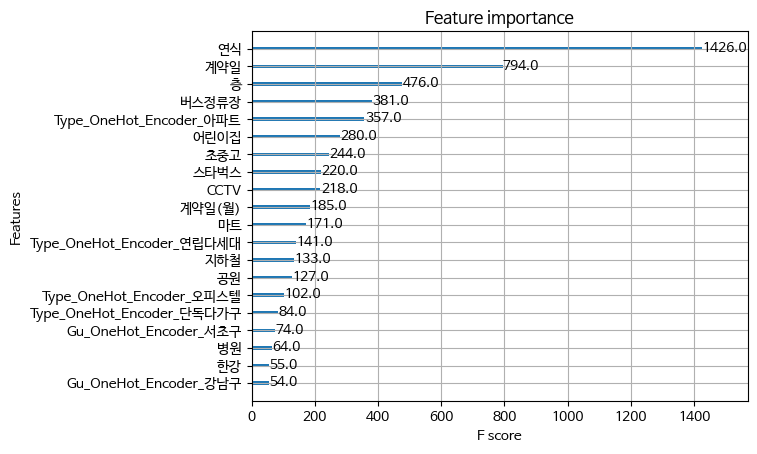

In [5]:
from xgboost import XGBRegressor
from xgboost import plot_importance

X_features = df.iloc[:, :-1]
y_label = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

params = {
    'max_depth':10,
    'eta': 0.05,
    'objective': 'reg:squarederror'  # 회귀용 목적 함수로 변경
}
model = XGBRegressor(params=params, random_state=11)
model.fit(X_train, y_train)

plot_importance(model, max_num_features=20)

Mean Absolute Error: 409.37723791488867
Mean Squared Error: 333222.20576618245
Root Mean Squared Error: 577.2540218709458
Mean Squared Log Error: 0.13118234734052794
Mean Absolute Percentage Error: 30.745064966022884
Mean Percentage Error: -14.90198328987424
              실제값          예측값
동                             
가락동   2546.879958  2544.170410
가리봉동  1642.625283  1595.384155
가산동   2438.044269  2439.221924
가양동   1941.416840  1930.656860
가회동   1722.827903  1309.544678
...           ...          ...
효창동   2430.199235  2431.145020
후암동   1625.261842  1620.166626
휘경동   1872.946527  1844.037842
흑석동   2183.732827  2272.449707
흥인동   3024.263098  3046.342529

[394 rows x 2 columns]


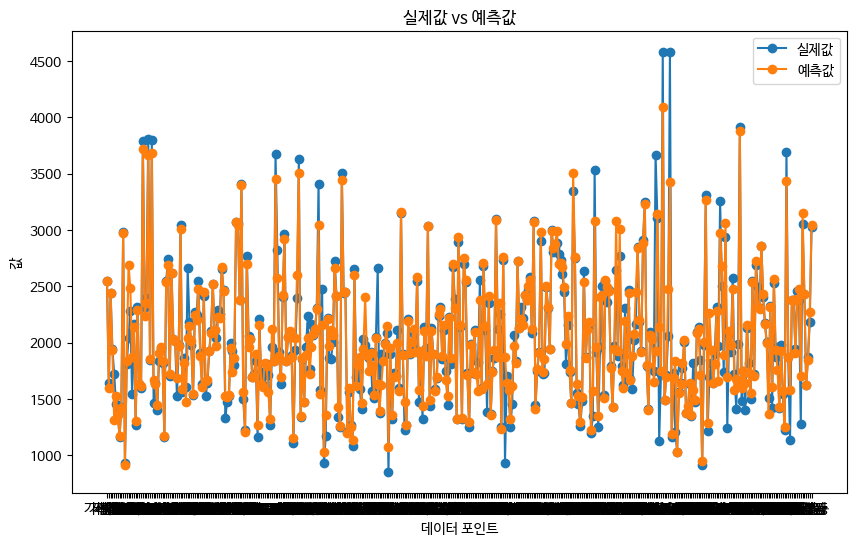

In [6]:
# XGboost
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')


import matplotlib.pyplot as plt

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 실제값과 예측값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

In [11]:
# RandomizedSearchCV(하이퍼파라미터 튜닝)
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators' : [100, 500 , 1000] , # 반복 횟수
    'gamma' : [0, 1, 2] , # 감마
    'eta' : [0.01, 0.02, 0.03, 0.04, 0.05],
    'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
    'subsample' : [0.6 , 0.8 , 1], # 서브샘플 비율
    'mean_child_weight' : [0.9, 1, 1.1] , # L1 정규화
    'reg_lambda' : [0.9, 1, 1.1] , # L2 정규화
    'importance_type' : ['gain'] ,
}

model_2 = XGBRegressor(random_state= 11) # 모델 객체 생성
rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
rs.fit(X_train , y_train)
rs.best_params_

TerminatedWorkerError: ignored

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

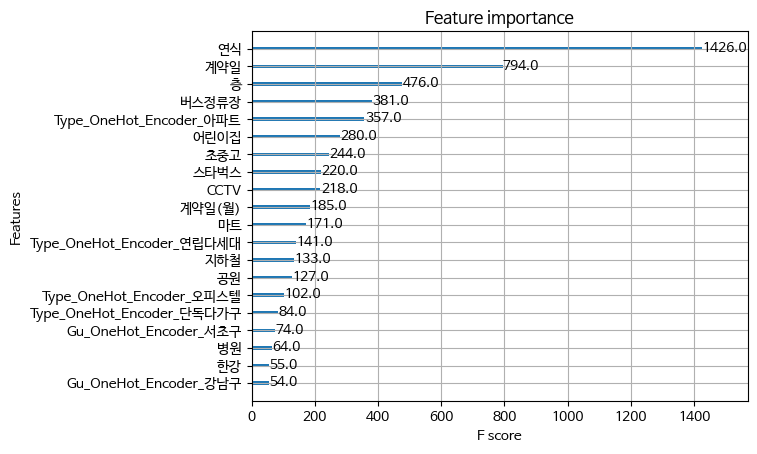

In [9]:
params_best = {
    'alpha':10,
    'lambda':30,
    'max_depth':20,
    'subsample':0.6,
    'eta': 0.05,
    'objective': 'reg:squarederror'  # 회귀용 목적 함수로 변경
}

model_best = XGBRegressor(params=params_best, random_state=11)
model_best.fit(X_train, y_train)

plot_importance(model_best, max_num_features=20)

Mean Absolute Error: 409.37723791488867
Mean Squared Error: 333222.20576618245
Root Mean Squared Error: 577.2540218709458
Mean Squared Log Error: 0.13118234734052794
Mean Absolute Percentage Error: 30.745064966022884
Mean Percentage Error: -14.90198328987424
              실제값          예측값
동                             
가락동   2546.879958  2544.170410
가리봉동  1642.625283  1595.384155
가산동   2438.044269  2439.221924
가양동   1941.416840  1930.656860
가회동   1722.827903  1309.544678
...           ...          ...
효창동   2430.199235  2431.145020
후암동   1625.261842  1620.166626
휘경동   1872.946527  1844.037842
흑석동   2183.732827  2272.449707
흥인동   3024.263098  3046.342529

[394 rows x 2 columns]


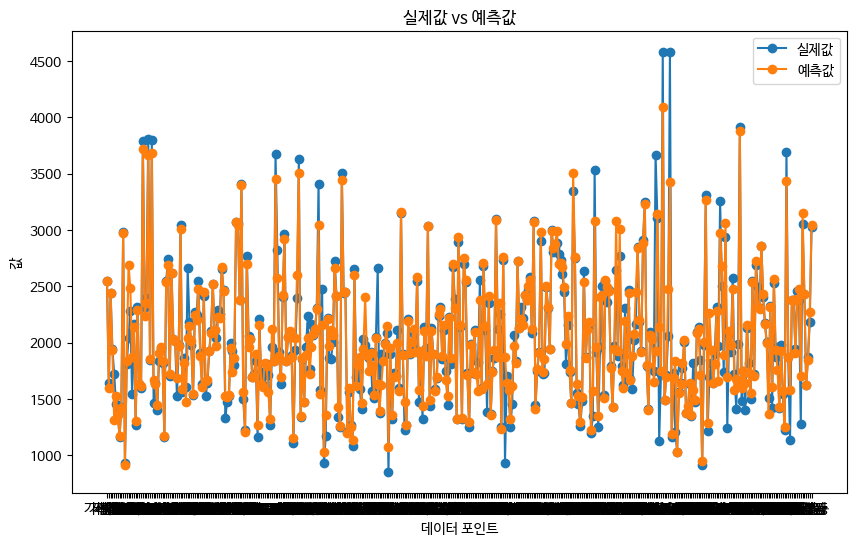

In [10]:
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')


import matplotlib.pyplot as plt

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 실제값과 예측값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()